## 3. PCA

For this question, the following tasks have been undertaken:

1. Visualizing the data from the file DataPCA.csv.
2. Training PCA. 
3. Plotting the variance explained versus PCA dimensions. 
4. Reconstructing the data with various number of PCA dimensions and computing their MSE with respect to the original data.

In [49]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


%matplotlib inline

### Part a

We shall first visualize the data.

In [2]:
df1 = pd.read_csv("DataPCA.csv")
df1.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


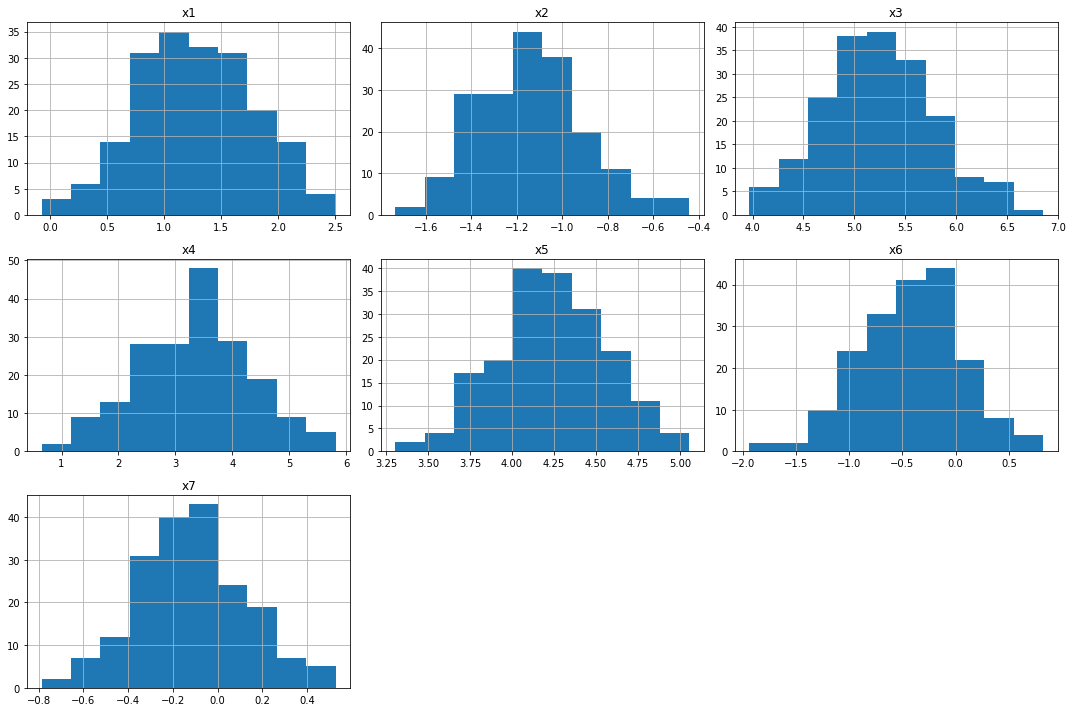

In [3]:
df1[['x1', 'x2', 'x3',
       'x4', 'x5', 'x6', 'x7']].hist(figsize=(15,10))
plt.tight_layout()

We observe that the data provided is reasonably distributed. We shall scale the data next using the standard scaler. 

Reference:

1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [4]:
scaler = StandardScaler()
scaler.fit(df1)
X_scale = scaler.transform(df1)

df_scale = pd.DataFrame(X_scale, columns=df1.columns)
df_scale.head()

,x1,x2,x3,x4,x5,x6,x7
0,-0.879702,0.203581,-0.717812,0.937130,0.240310,0.572178,0.817830
1,0.066901,-0.164833,-0.013778,-0.047812,0.151606,0.102283,-0.215624
2,0.495178,-0.172416,0.550176,0.052044,-0.800676,-0.988900,0.835247
3,-1.819170,0.021640,-1.688840,2.220573,0.934360,1.570859,1.551955
4,0.554357,0.089743,0.524348,-0.855438,-0.236998,-0.409231,-0.720773


### Part b

After scaling the data, we train the PCA model.

Reference:

1. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [5]:
# Train PCA 
pca = PCA().fit(df_scale)   

In [6]:
print(pca.explained_variance_ratio_)
print(pca.components_)

[6.09270567e-01 3.19460967e-01 6.49562011e-02 6.07238580e-03
 2.16027661e-04 1.98460843e-05 4.00494511e-06]
[[ 0.43317128  0.10688441  0.47876303 -0.44964211 -0.37624049 -0.45319076
  -0.15035799]
 [-0.27755113  0.58261645  0.07397819  0.20409753 -0.41973091 -0.10010361
   0.59177707]
 [-0.17626997  0.65002822  0.05259511 -0.28649785  0.06206424  0.44281272
  -0.51147813]
 [ 0.55915884  0.03818838  0.45641243  0.39746127  0.04595249  0.54178701
   0.15475942]
 [-0.11037788 -0.09304976 -0.01507989  0.59615727 -0.5428373  -0.09666457
  -0.56525322]
 [-0.5428688  -0.12514317  0.73396168  0.12268238  0.33143193 -0.15132589
  -0.05599364]
 [ 0.29104723  0.44812909 -0.12372342  0.38164805  0.52133099 -0.51257933
  -0.13778803]]


In [7]:
# calculate percentage of variation that each pricipal component accounts for
per_vari = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [8]:
per_vari

array([60.9, 31.9,  6.5,  0.6,  0. ,  0. ,  0. ])

In [9]:
labels = ['PC' + str(x) for x in range(1, len(per_vari)+1)]

In [10]:
labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

### Part c 

We now plot the variance explained versus PCA dimensions.

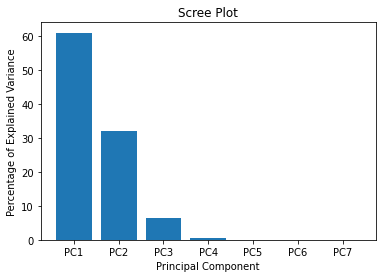

In [11]:
# perpare for the Scree plot
plt.bar(x=range(1,len(per_vari)+1), height=per_vari, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

From the above, we observe that the order of principal components corresponds to the magnitude of explained variance by the corresponding component.

### Part d

We attempt to reconstruct the data using the principal components and calculate the MSE.

In [51]:
## Now lets use the first principal component
# Train PCA 
def calc_mse( df_orig, n_comp = 1): 
  pca1 = PCA(n_components=n_comp).fit(df_orig)   
  pca1_data = pca1.transform(df_orig)
  pca1_projected = pca1.inverse_transform(pca1_data)
  data_pca1_flatten = pca1_projected.flatten()
  data_original_flatten = df_orig.to_numpy().flatten()
  mse = mean_squared_error(data_original_flatten, data_pca1_flatten)
  return mse

In [52]:
# for 1 - 7 components can be done in a loop as well
mse1 = calc_mse(df_scale, 1)
print(mse1)
mse2 = calc_mse(df_scale, 2)
print(mse2)
mse3 = calc_mse(df_scale, 3)
print(mse3)
mse4 = calc_mse(df_scale, 4)
print(mse4)
mse5 = calc_mse(df_scale, 5)
print(mse5)
mse6 = calc_mse(df_scale, 6)
print(mse6)
mse7 = calc_mse(df_scale, 7)
print(mse7)

0.39072943283022843
0.07126846555354302
0.0063122644854415886
0.00023987869019137411
2.3851029452934035e-05
4.004945107075576e-06
2.7427532366523315e-31


In [54]:
x = [ 1, 2, 3, 4, 5, 6, 7]
y = [ mse1, mse2, mse3, mse4, mse5, mse6, mse7]

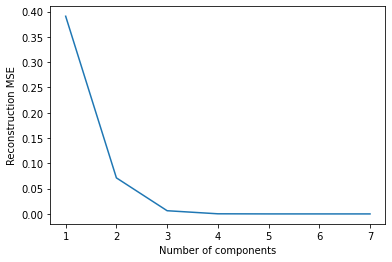

In [56]:
plt.plot(x,y)
plt.ylabel('Reconstruction MSE')
plt.xlabel('Number of components')
plt.show()

From the above plot, we observe that the reconstruction error decreases as the number of principal components increase but the decrease slows down significantly after the third component.